In [71]:
%%time
import sys
import os
import re
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, save_model
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

Wall time: 1.01 ms


In [2]:
def dts():
    return datetime.datetime.now().strftime('%m%d%y_%H%M%S')

In [3]:
dts()

'020920_064907'

In [4]:
tweet_df = pd.read_excel('../data/processed/twitter_corpus_small_020820_062521.xlsx')

In [5]:
tweet_df.shape

(47847, 9)

In [6]:
tweet_df['OneHotLabel'] = np.where(tweet_df['Polarity'] == True ,1,0)

In [9]:
tweet_df.head()

,Unnamed: 0,Unnamed: 0.1,text_id,Text,sentiment,processed_text,Polarity,OneHotLabel,tweet_len
0,102434,102434,20366,deserve to leave the building until everyone i...,0.55556,deserve leave building everyone,True,1,77
1,130992,130992,122908,in a sense,0.50000,sense,False,0,51
2,55041,55041,26943,There 's not much more to this adaptation of t...,0.73611,there much adaptation,True,1,66
3,182105,182105,210508,retrieve her husband,0.50000,retrieve husband,False,0,62
4,138411,138411,202988,is if you have a case of masochism and an hour...,0.13889,case masochism hour,False,0,65


In [10]:
tweet_df['OneHotLabel'].value_counts()

0    26610
1    21237
Name: OneHotLabel, dtype: int64

In [11]:
tweet_df.dtypes

Unnamed: 0          int64
Unnamed: 0.1        int64
text_id             int64
Text               object
sentiment         float64
processed_text     object
Polarity             bool
OneHotLabel         int32
tweet_len           int64
dtype: object

In [12]:
tweet_df['processed_text'] = tweet_df['processed_text'].astype(str)

In [23]:
%%time
tweet_df['tweet_text'] = "text"
#tweet_df['tweet_text'] = tweet_df[['processed_text']].apply(lambda x: str(x), axis=1)
tweet_df['tweet_text'] = tweet_df['processed_text'].str.replace(',',' ')

Wall time: 99.1 ms


In [24]:
tweet_df.dtypes

Unnamed: 0          int64
Unnamed: 0.1        int64
text_id             int64
Text               object
sentiment         float64
processed_text     object
Polarity             bool
OneHotLabel         int32
tweet_len           int64
tweet_text         object
dtype: object

In [32]:
tweet_df['tweet_text'][:5]

0    deserve leave building everyone
1                              sense
2              there much adaptation
3                   retrieve husband
4                case masochism hour
Name: tweet_text, dtype: object

In [25]:
train, test = train_test_split(tweet_df,test_size=0.25,stratify=tweet_df['OneHotLabel'], random_state=100)

In [26]:
X_train = train['tweet_text'].copy()
Y_train = train['OneHotLabel'].copy()
X_test = test['tweet_text'].copy()
Y_test = test['OneHotLabel'].copy()

In [27]:
(len(X_train),len(Y_train)),((len(X_test),len(Y_test)))

((35885, 35885), (11962, 11962))

In [18]:
tweet_tokens = [str(tweet).split() for tweet in X_train]

In [19]:
len(tweet_tokens)

35885

In [22]:
for tweet in X_train:
    print(tweet)

shows
flog dead horse surprise
dark visions already relayed superb
this story determined woman courage
phenomenal water born cinematography
us wondering less ideas abo
film past
impeccable acting script takes
the inherent strength
one established warner bros giant
could made african americans b
it example sophisticated challengin
qualities modern situation co
never good sign film star spend
recommended engrossing story hor
plenty impress e t
quickly snowballs
bond
barely goes beyond comic book status
learns believing something
simply dazzling particularly balk
made least one damn fine horror
drive past
extreme tv rendition
halloween gory slash fest
laughs
screwed man dared mess som
project comes across clinical detached
mentally superior
explosive physical energy convincing intel
likely
movie like
an entertainment love overinfla
aim sympathy
symbolically
famed charisma
knowledge
stationary camera
fiennes steals red dragon right
dangers drugs
car pileup
surprise see world class film
bri

juicy
broken legs
knockaround guys rarely seems interested
minute idea
busts comfy little cell
puerile
margins
it easy one review
director wally
may cause parents sleepless hours
power movie undeniable
some movies blend together become dist
given movies expect us root c
but one thing sure
still nice little picture
this kind movie need
might want catch freaks matinee
cheap hysterics
wisdom
send
intense scrutiny minutes
drastic iconography
movies
cabins
the ingenious construction adapted david
american young men
small movie
film like the hours alternative
nan
disturbing great white hope undertone
tony hawk style stunts
projects like lrb unfortunately r rated
uneven dialogue plot lapses
images lack contrast
nan
princess
big dumb happy movie
i n
retooling fahrenheit
daily
held together skilled ensemble actors
action comedies
fabulously funny
best teenagers
mute kids nearly minutes
without vital comic ingredient hila
eddie murphy robert deniro showtime
took long time
fame first place
like p

not reminder used make
unrelenting dickensian decency tu
aiello
half
best described lukewarm
little known
initially
defiantly delightfully grain
man shot cannon vat ic
jonathan swift
it haunts horrifies startles fascinate
career
fully written
almost wins end
real conflict
feels started explore obvious
a wild ride juiced enough energy exci
i confession make i n partic
top movies n care bein
film
expect studio
first sight even important
estranged gay
a film best appreciated
one another
highlights
nan
items
might distracted movie quick move
expensive
n talking talk appeals
addressing turn th century int
fanatic
christopher walken kinda romanced cyndi lauper
something inexplicably strange happe
wo n placed pantheon best
showtime one hapless victims
brilliant piece filmmaking
a movie friday fans
unintentional giggles
flick antonio banderas
todd farmer screenplay simple
make jay silent bob excellent adventure
pass stinker
retitle the adventures direct video nash
participatory spectator
ninco

thousands
propulsive incident
the movie major devastating flaw
barn side target sons
plot holes big enough train car
raw insight
elliptically loops
worst
improves
rap stars
back forth ca n help
subtlety warmth
the problem amazingly enough
played
breaks mood absurdly inappropriate
pinned
standard hollywood bio pic schrader aim
film far superior predecessor a
quest taken seriously
overwrought new sequence
seven
perhaps snuck feet
action fantasy
a baffling misfire
build terrifying obvious conclusion
damage
film strength n details
a lovably old school hollywood confection
byler
comes entertainment
alain choquart camera
inhuman cinematic punishment
farts boobs unmentionables
junior high school
starts clever veers overkill
makes depleted yesterday feel much
well spent
get idea
leaves hole center the salton sea
i n laugh
entertainment
rarely film
an engaging formulaic sports drama carr
stuttering script
compelling portrait moral emptiness
lousy way
audience like beatrice watchful
heartache ev

definite weaknesses
bryan adams
delicious crime drama
youthful anomie
trademark several performances
weirdly beautiful place
film speaks
heart story
scale lunatic heights joe dante simi
works
there time second round see
a rarity among recent iranian films
a feel good picture best sense term
whooshing
brilliant brutal uk crime film
handle
vivid characters warm moving message
loving seeing
sexual relationship n hur
complex quirky entirely believab
trauma
epicenter
directed without expected flair imagina
eisenhower era
needed sweeping dramatic hollywood moments
probably like rollerball
mr serrault
horror thriller
parental units
acts feral intensity young bet
a tender touching drama
a depressingly retrograde post feminist
brain way current films
the kid stays
reaches deepest recesses chara
the good good
current teen fare
schoolgirl
alan arkin
crossed john carpenter ghosts mars
famous dad author death ve
clinical poetic
film small shriveled
portrayed almost supernatural powers
inspirational

overstuffed
may find baffling
upsetting glimpse
director jackson
the film painfully authentic
i unable get full brunt comedy
make real deal leftover enron sto
no better worse truth consequence
midlevel sort way
enjoy
six
though goes
busy basketball court w
least
one scene another supposedly fun
ranks players
manipulative claptrap
trying capture novel deeper intimate
shadyac shoots film like m night shya
breakthrough
seen conversation starter
fairly judge film like ringu
fights good fight vietnam
tempting go
neither parker donovan typical romant
auschwitz ii birkenau
heartbreakingly
might work better
smarter thou wayward teen
mib ii succeeds due rapid fire deliv
toss presiding end ci
follows standard formula
better drug related pictures
lo comprueba
believe dreams
nary original idea
cheap moments
chomp jumbo ants
unforgivingly
winning comedy
brought back value respect th
science
lacks substance
fascinating study isolation frustration
n work
nan
dull enjoy
whitaker misfit artist concerne

the ending leave unfulfilled
powerful political message stuffed
audiences expected suspend dis
william randolph hearst
screenplay
nicks
williams creates stunning taxi driver esqu
it day beach air condition
behind scenes navel gazing kaufman
reflected almost every scene
threadbare comic setups
surfer
patch
little girl girl action
creaky pretty woman retread
film good one
buzz whir little
look american angst eye end laug
several greek american weddings
right frame mind
the movie
both stars manage funny
people loved paradiso
fessenden continues interesting work
haynes homage films all th
breathes surprising new life familiar
provide scant reason
a four star performance kevin kline u
growing moldering pile well ex
costumes gianni versace
punk
hard imagine anyone managing steal
little known story native americans
mein general tso
crisper
ringside seat
distended pace foot dragging rhythms
nearly impossible look understand
sometimes wry adaptation v s naipa
it quite vision
end might infuriati

fantastically vital
sensitive ensemble performances good perio
cultural artifacts
establishing time place
gorgeously
may important movie even good
better eponymous biopic
right stuff silly summer entertainment
ignore fact hollywood n laugh
where movie
journalistically
self referential hot air
seeing american football stadium nuked p
increasingly unsettling sense fore
be forewarned depressed
willie would loved
unruly adolescent boy
little
caliber cast
frustration
wade
wow
difficult task
i ca n remember single name responsible fo
deeply
one reasons watch film whi
becomes specimen character
enjoy
bright
construct story even trace dramati
w bush
beautiful
unexpected zigs
jolie gives extra little something tha
infuses film sensibility par
ultimately thoughtful without much
gorgeous
know all queen men
a documentary make stones weep sh
little
hard believe relationship like holly
sad state recent career
deuces wild encyclopedia cliches
soap opera ish dialogue
racist portraits
might tempting re

though ford neeson capably hold intere
nan
controversial eponymous fiercely atheistic
surfing
delight without much story
funny
bollywood films
great subject
rather forcing us endure every plot
draws elegant visual sense talent
way
catch me
n good
words
dazzlingly self assured directorial
crazy guys
dr
enough charm good acting make intere
lot bullets some characters die
interested kicking around raison etre
l
bloody civil war
mostly admirable
loose
highly irritating first
good director
obligatory moments sentimental ooze
devilishly witty script
posing real movie
nan
least
best kind
should n allowed use word
equally beautiful self satisfied
sitcom worthy
australian director john polson
valedictory
go since simone real
flick fun host truly e
first time since desperately seeking susan
good hearted ensemble comedy varie
clear trying say even
loved gollum performance incred
long suffering heroine
destined win wide summer audience
big time stinker
dull simple minded stereotypical
amalgam
get


honest unaffected gentle way
welcome step
make happy
jokes adults
monsterous
firmly held positions
aimlessly unsuccessfully attempts fuse
inexplicable sequels
or damn thing
seen stomp
set
frida certainly disaster
hitting head theater seat front
paranoid
among rare ones
film contrivance artificial
cruel reminder fate hundreds
an ambitious serious film
lacking
for martin made infinitely wrenching b
her performance
film far
short plot rich tiny revelati
big whoop
cross toxic chemicals bunch
dreary
probation officer
fantasies daydreams memories one fanta
characters drop pants laughs
bible parables actual story
master innuendo it see
veers sodden melodrama punctuated vi
blockbusters
i heard joke
another long line ultra violent war mo
fresh way
mothman
feeling
direct proportion
display original talent
example kind lush envelopin
the type dumbed exercise stereotype
kind production
still everybody wants
gets ugly
sweet harmless dumb
even
reek script rewrite designed garner th
done best
like th

glamour
wind glum mr de niro
fun
this n terrible film means
paints culture conflict
scott kalvert
intelligent
shop means big picture
good movie
egoyan work often elegantly considers vario
charismatic charmer
rockers
successful animated movies
test time
aspects
sensitivity
kevin costner
nan
buffoons
nan
disbelief
week
premier stylist
partnerships general air
nan
however completely honest open hear
it film taken literally
an unbelievably fun film leading man aw
well check one st
problem
moronic
pubescent scandalous
tortured torturing artists
like movie lot
like every bad idea ever gone
unpretentious sociologically pointed
might resent sometimes
somewhat well acted badly art directed
good name movie delibrately ob
one good idea
the second coming harry potter
the story line
paint numbers plot
intoxicating atmosphere
slow dreary
starts playing like general hospital crossed w
pretensions
little parable
whiffle ball epic
go la salle performance
main story
everlyn
insanely stupid awful
us n de

it months preview screening
series love probably want
reiner
laugh much movie
humor
padded allen jelly belly
n looking
archival footage horrifying documents lyn
sexist
filled people want live
big middle fingered
less magic kingdom
resonant
like bad imitation bard
movingly
what time is it there
family governance
undermines possibility exploration
mimetic approximation
played aching beauty trut
sullivan son
nan
young men
n give damn
quality manipulative engineering
new film lame kiddie flick
kaufman jonze take huge risks ponder th
better acting hilarious kenneth branagh
theater thinking grocery lists ways
might seem like proper cup
ca n pronounce gyro correctly
maudlin melodramatic expected boring
on interesting as
free rein pretentious
consumed lust love crushed betra
unburdened pretensions
multiple stories
promises offers unexpected window th
story irresponsible cops
road trip movie
never seen heard anything quite like th
new standards
particular bite
either
trippy ambitious downer
som

and way wo n talking ab
adolescent violence
jealousy sacrifice
judith zaza extended bedroom sequence
rare animal known perfect family film
plumbed martin scorsese
chance shine
watch robert deniro belt
tosca
road perdition display greatness
brings whole new meaning
my wife plotting nothing special
scherfig writer director made fi
depressing rewarding
exploring value choices worthwhile topic
pretensions
score choreography
sense
ethan hawke strained chelsea walls
fine movie go see
lovingly rendered
fairly lame
could hoot bad movie way
pretty tame
bryan adams
british cast
an unintentional parody
ego
american america
commended straight ahead approach c
good indication serious minded
murder mystery
beautifully
sure fil
longing block wood come back
sort thing fact still
better documentary l
film
devastating horror suffered entir
old enough earned year friendship
masterpiece
tolerate leon barlow i ca n
mob movie
also unoriginal
wo n enjoy movie
a sly game cat mouse intense
time done us mira na

annoyed
see summer
role jason bourne
movie truly going inspire
even story immersed love lust sin
attempts fashion brazil like hyper real
promise
home movie audrey rose
the hours wins best picture i might
joint
hollywood fluff
submarine movie unsettling spook
puke
art film
actress
cloyingly hagiographic portrait cuba
kaufmann quills
meant star wars fans
director novelist byatt
exercise chilling style twohy f
draws attention like magnet acts c
darkly atmospheric
plot
directors dean deblois chris sanders
nan
comedy scenes
reasons enough see
scented bath
year radar screen
direction kevin reynolds
look painful incident made headlines
keeps things interesting
spectacular piece
latest schwarzenegger stallone
it dabbles around never gaining much mom
long shot
a poignant lyricism
anne meara
fact
something else altogether clownish
zoning
relationship
whether like rap music loathe
robert altman spike lee
good cinematography
ca n quite recommend windu
gives little
comic relief
does impressive job 

linearity
filmmaker would disagree
the film nearly terminal case cut
better still
second half movie
incessant whining
bore
even lulls emotions seem
goodall chimpanzees bigger
recite bland police procedural details
seems content dog paddle mediocre en
massive infusion old fashioned holly
often forgotten fact
dud frame one
inexplicable
well made funny entertaining
kooky overeager spooky
director robert j siegel allows character
also need movies like tim mccann revolution
an impossible romance root pa
i ca n wait see director
big mess movie full images
tea
depressingly
warthog heaven
going motions beginning
seems embarrassed
worse poor acting ensemb
good ear dialogue characters
one funnier movies
unsympathetic hero caught intricat
charismatic jackie chan
like one
artist
social status
monster science fiction flicks
oscar worthy performance
one hour
ca n really called animation
unhappy situation around
glaring unforgettable
byatt plot
turning one man triumph eve
who knows exactly godard
eve

In [59]:
MAX_WORDS = 8000
def tokenize(tweets):
    tokenizer = Tokenizer(num_words = MAX_WORDS)
    tokenizer.fit_on_texts(tweets)
    with open(f'../reports/tweets_tokenizer_{dts()}.txt','w') as file_obj:
        tokenizers = OrderedDict(sorted(tokenizer.word_counts.items(), key = lambda x: x[1]))
        file_obj.write(str(tokenizers))
    return tokenizer

In [60]:
%%time
tweets_tokenizer = tokenize(X_train)

Wall time: 697 ms


In [61]:
%%time
X = tweets_tokenizer.texts_to_matrix(X_train, mode='tfidf')

Wall time: 1.3 s


In [62]:
len(X)

35885

In [43]:
tweets_tokenizer.word_counts.items()

odict_items([('shows', 37), ('flog', 2), ('dead', 40), ('horse', 5), ('surprise', 20), ('dark', 74), ('visions', 3), ('already', 41), ('relayed', 2), ('superb', 6), ('this', 153), ('story', 455), ('determined', 16), ('woman', 42), ('courage', 26), ('phenomenal', 5), ('water', 35), ('born', 8), ('cinematography', 19), ('us', 197), ('wondering', 9), ('less', 121), ('ideas', 44), ('abo', 12), ('film', 1147), ('past', 40), ('impeccable', 7), ('acting', 97), ('script', 108), ('takes', 93), ('the', 972), ('inherent', 10), ('strength', 14), ('one', 641), ('established', 3), ('warner', 6), ('bros', 11), ('giant', 19), ('could', 161), ('made', 213), ('african', 12), ('americans', 15), ('b', 136), ('it', 387), ('example', 10), ('sophisticated', 14), ('challengin', 1), ('qualities', 9), ('modern', 56), ('situation', 24), ('co', 46), ('never', 172), ('good', 396), ('sign', 21), ('star', 94), ('spend', 16), ('recommended', 13), ('engrossing', 27), ('hor', 1), ('plenty', 27), ('impress', 4), ('e', 8

In [75]:
NEURONS = 200

def single_layer_nn():
    model = Sequential()
    model.add(Dense(NEURONS, input_shape=(MAX_WORDS,), kernel_initializer='normal'))
    model.add(Activation('relu'))
    model.add(Dense(NEURONS, kernel_initializer='normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,kernel_initializer='normal'))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 200)               1600200   
_________________________________________________________________
activation_9 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               40200     
_________________________________________________________________
activation_10 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 201       
_________________________________________________________________
activation_11 (Activation)   (None, 1)                 0         
Total params: 1,640,601
Trainable params: 1,640,601
Non-trainable params: 0
_________________________________________________________________


In [76]:
%%time
model = single_layer_nn()
history = model.fit(X, Y_train, epochs = 5, batch_size=1024, validation_split=0.2, verbose=0 , callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Wall time: 29.1 s


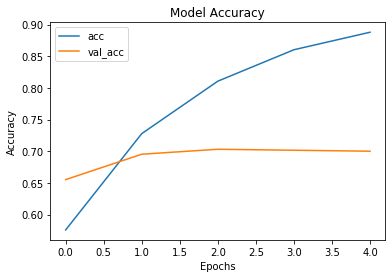

In [77]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

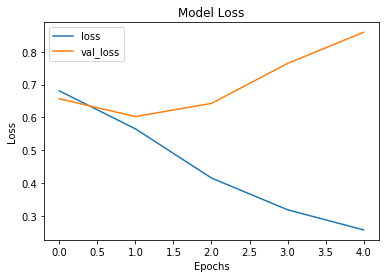

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['loss', 'val_loss'], loc = 'upper_right')
plt.show()